# doc.c.plot - Plotting with Matplotlib

the `doc.c.plot` module allows creating data plots directly from the FEFLOW model. This is useflow for visualization in an interactive environments like Jupyter, or for batch processing of images. This module uses the popular python library *matplotlib* ([matplotlib.org](https://matplotlib.org))

The functions resemble the functionality of the *View Components Panel*. The functions accept most keyword arguments of the underlying matplotlib plot functions to control the plot style. The default plot styles are chosen to  minmic output from FEFLOW's user interface.

In [1]:
import ifm_contrib as ifm
from ifm import Enum
ifm.forceLicense("Viewer")
ifm.getKernelVersion()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
doc = ifm.loadDocument("./../../unittests/models/example_2D.dac")

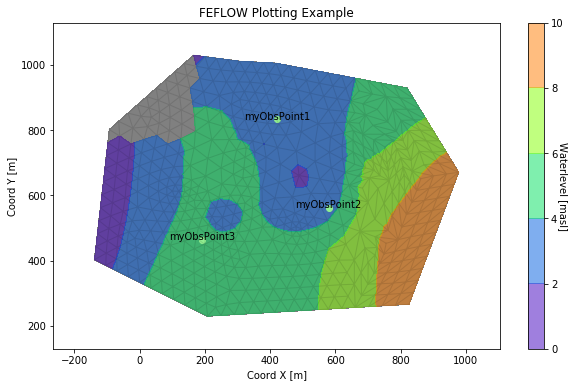

In [3]:
# create a new matplotlib figure, set equal x, y axis
fig, ax = plt.subplots(1, figsize=(10,6))
plt.axis("equal")

# add the mesh (faces, edges) and plot fringes of water level
doc.c.plot.faces()
doc.c.plot.edges(alpha=0.1)
doc.c.plot.fringes(par=Enum.P_HEAD, levels=[0,2,4,6,8,10])

# add the observation points
doc.c.plot.obs_markers()
doc.c.plot.obs_labels()

# add colorbar, title and axis labels
cbar = plt.colorbar()
cbar.set_label('Waterlevel [masl]', rotation=270)
plt.title("FEFLOW Plotting Example")
plt.xlabel("Coord X [m]")
plt.ylabel("Coord Y [m]")

# save and plot
plt.savefig("figure1.png")  # png image
plt.savefig("figure1.svg")  # vector graphics
plt.show()